|||
|---|---|
|Title|nwreadinglistmanager|
|Author|numbworks|
|Version|3.0.0|
||Please check [docs/docs-nwreadinglistmanager.md](../docs/docs-nwreadinglistmanager.md) before proceeding.|

#### Setup

In [355]:
install_dependencies : bool = False

if install_dependencies:
    %pip install numpy==1.26.3
    %pip install pyarrow==15.0.0
    %pip install openpyxl==3.1.0
    %pip install pandas==2.2.0
    %pip install requests==2.31.0
    %pip install matplotlib==3.8.2
    %pip install coverage==7.2.3
    %pip install parameterized==0.9.0
    %pip install tabulate==0.9.0
    %pip install sparklines==0.4.2


#### Global Modules

In [356]:
from datetime import datetime
from pandas import DataFrame

#### Local Modules

In [357]:
from nwshared import VersionChecker, PlotManager
from nwreadinglistmanager import DefaultPathProvider, YearProvider, SettingBag, ComponentBag
from nwreadinglistmanager import ReadingListManager, MarkdownProcessor

#### Python Version Check

In [358]:
status : str = VersionChecker().get_python_version_status(required = (3, 12, 1))
print(status)

The installed Python version is matching the expected one (installed: '3.12.1', expected: '3.12.1').


#### Functions : Temp

#### Settings

In [359]:
setting_bag : SettingBag = SettingBag(

    show_books_df = False,
    show_sas_by_month_df = True,
    show_sas_by_year_street_price_df = True,
    show_rolling_total_df = True,
    show_sas_by_topic_df = True,
    show_sas_by_publisher_df = False,
    show_sas_by_publisher_flt_df = True,
    show_sas_by_rating_df = True,
    show_reading_list_by_kbsize_df = True,
    show_yearly_trend_by_topic_df = True,
    show_books_by_year_box_plot = True,
    show_reading_list_by_kbsize_box_plot = True,
    show_readme_md = True,
    show_reading_list_by_month_md = False,
    show_reading_list_by_publisher_md = False,
    show_reading_list_by_rating_md = False,
    show_reading_list_by_topic_md = False,
    show_reading_list_topic_trend_md = False,
    show_reading_list_md = False,
    save_reading_list_by_month_md = False,
    save_reading_list_by_publisher_md = False,
    save_reading_list_by_rating_md = False,
    save_reading_list_by_topic_md = False,
    save_reading_list_topic_trend_md = False,
    save_reading_list_md = False,
    working_folder_path = "c:/Users/Rubèn/Desktop/",
    read_years = YearProvider().get_all_years(),
    excel_path = DefaultPathProvider().get_default_reading_list_path(),
    excel_books_nrows = 275
)


#### Main : Analysis

In [360]:
reading_list_manager : ReadingListManager = ReadingListManager(component_bag = ComponentBag(), setting_bag = setting_bag)
books_df : DataFrame = reading_list_manager.get_books_dataset()

if setting_bag.show_books_df:
    display(books_df.head(n = setting_bag.n_generic))


In [361]:
rolling_total_df : DataFrame = reading_list_manager.get_rolling_total(books_df = books_df)

if setting_bag.show_rolling_total_df:
    display(rolling_total_df.head(n = setting_bag.n_generic))


,Years,Books,Pages,TotalSpend,LastUpdate
0,9,274,73085,$7611.63,2024-03-23


In [362]:
sas_by_month_df : DataFrame = reading_list_manager.get_sas_by_month(books_df = books_df)

if setting_bag.show_sas_by_month_df:
    display(sas_by_month_df.head(n = setting_bag.n_by_month))


,Month,2016,↕,2017,↕,2018,↕,2019,↕,2020,↕,2021,↕,2022,↕,2023,↕,2024
0,1,0 (0),↑,13 (5157),↓,0 (0),↑,4 (1061),↓,0 (0),=,0 (0),=,0 (0),=,0 (0),↑,3 (855)
1,2,0 (0),↑,1 (106),↓,0 (0),↑,13 (2991),↓,0 (0),↑,11 (1289),↓,0 (0),=,0 (0),↑,14 (5573)
2,3,0 (0),↑,16 (3816),↓,6 (600),↑,20 (3349),↓,0 (0),↑,2 (612),↓,0 (0),↑,1 (139),↓,0 (0)
3,4,0 (0),↑,8 (2539),↓,7 (1986),↓,0 (0),↑,9 (2226),↓,0 (0),=,0 (0),=,0 (0),,
4,5,1 (288),↑,13 (3527),↓,0 (0),=,0 (0),=,0 (0),=,0 (0),=,0 (0),=,0 (0),,
5,6,8 (1734),↓,4 (788),↓,1 (24),↓,0 (0),=,0 (0),=,0 (0),=,0 (0),↑,8 (642),,
6,7,4 (1758),↓,3 (1140),=,3 (427),↓,2 (444),↓,0 (0),=,0 (0),=,0 (0),=,0 (0),,
7,8,2 (334),↓,1 (453),↓,0 (0),↑,2 (848),↓,0 (0),=,0 (0),=,0 (0),↑,4 (1170),,
8,9,4 (881),↓,3 (840),↓,0 (0),↑,1 (1259),↓,0 (0),=,0 (0),↑,1 (360),↑,9 (1969),,
9,10,2 (275),↓,0 (0),↑,6 (1201),↓,0 (0),↑,6 (1941),↓,0 (0),=,0 (0),=,0 (0),,


In [363]:
sas_by_year_street_price_df : DataFrame = reading_list_manager.get_sas_by_year_street_price(
    sas_by_month_df = sas_by_month_df, 
    books_df = books_df)

if setting_bag.show_sas_by_year_street_price_df:
    display(sas_by_year_street_price_df.head(n = setting_bag.n_generic))


,2016,↕,2017,↕,2018,↕,2019,↕,2020,↕,2021,↕,2022,↕,2023,↕,2024
0,43 (12322),↑,62 (18366),↓,48 (12646),↓,42 (9952),↓,23 (6602),↓,13 (1901),↓,1 (360),↑,25 (4508),↓,17 (6428)
1,$1447.14,↑,$2093.14,↓,$1249.15,↓,$748.70,↓,$538.75,↓,$169.92,↓,$49.99,↑,$594.80,↑,$720.04


In [364]:
sas_by_topic_df : DataFrame = reading_list_manager.get_sas_by_topic(books_df = books_df)

if setting_bag.show_sas_by_topic_df:
    display(sas_by_topic_df.head(n = setting_bag.n_generic))


,Topic,Books,Pages
0,Software Engineering,75,20719
1,C#,56,16449
2,"Data Analysis, Data Science, ML",32,8105
3,Python,31,8994
4,"BI, Data Warehousing, PowerBI",21,6189


In [365]:
sas_by_publisher_df : DataFrame = reading_list_manager.get_sas_by_publisher(books_df = books_df, setting_bag = setting_bag)

if setting_bag.show_sas_by_publisher_df:
    display(sas_by_publisher_df.head(n = setting_bag.n_generic))


In [366]:
sas_by_publisher_flt_df : DataFrame = reading_list_manager.filter_by_is_worth(sas_by_publisher_df = sas_by_publisher_df)

if setting_bag.show_sas_by_publisher_flt_df: 
    display(sas_by_publisher_flt_df.head(n = setting_bag.n_generic))


,Publisher,Books,AvgRating,IsWorth
0,Syncfusion,38,2.55,Yes
1,Manning,12,2.75,Yes
2,Wiley,9,2.78,Yes


In [367]:
sas_by_rating_df : DataFrame = reading_list_manager.get_sas_by_rating(books_df = books_df, formatted_rating = setting_bag.formatted_rating)

if setting_bag.show_sas_by_rating_df:
    display(sas_by_rating_df.head(n = setting_bag.n_generic))


,Rating,Books
0,★★★★★,9
1,★★★★☆,20
2,★★★☆☆,76
3,★★☆☆☆,95
4,★☆☆☆☆,74


In [368]:
rl_by_kbsize_df : DataFrame = reading_list_manager.get_reading_list_by_kbsize(books_df = books_df, n_by_kbsize = setting_bag.n_by_kbsize)

if setting_bag.show_reading_list_by_kbsize_df:
    display(rl_by_kbsize_df)


,Title,ReadYear,Topic,Publisher,Rating,KBSize,A4Sheets
1,Machine Learning For Dummies,2017,"Data Analysis, Data Science, ML",Wiley,4,3732,8
2,Machine Learning Projects for .NET Developers,2017,"Data Analysis, Data Science, ML",Apress,4,3272,7
3,Producing Open Source Software,2016,Software Engineering,O'Reilly,2,2332,5
4,Microsoft SQL Server 2012 Integration Services,2019,"BI, Data Warehousing, PowerBI",Wiley,3,2320,5
5,Infrastructure As Code,2019,Development Tools,O'Reilly,4,2269,5
6,Microsoft Visual C# 2013 Step by Step,2016,C#,Microsoft Press,4,2179,5
7,Microservices in .NET Core,2019,C#,Manning,2,2016,5
8,Head First Design Patterns,2017,Software Engineering,O'Reilly,5,1753,4
9,Exam Ref 70-768 Developing SQL Data Models,2019,"BI, Data Warehousing, PowerBI",Pearson Education,5,1679,4
10,Algorithms An illustrated guide for programmer...,2017,Software Engineering,Manning,5,1650,4


In [369]:
yt_by_topic_df : DataFrame = reading_list_manager.get_yearly_trend_by_topic(books_df = books_df, setting_bag = setting_bag)

if setting_bag.show_yearly_trend_by_topic_df:
    display(yt_by_topic_df)


,Topic,Books,Trend
0,"BI, Data Warehousing, PowerBI","[0, 1, 9, 11, 0, 0, 0, 0, 0]",▁▁▃▄▁▁▁▁▁
1,C#,"[10, 14, 4, 17, 8, 3, 0, 0, 0]",▄▅▂▅▃▂▁▁▁
2,Cloud Vendors,"[0, 0, 0, 0, 0, 2, 0, 1, 0]",▁▁▁▁▁▂▁▁▁
3,"Data Analysis, Data Science, ML","[5, 5, 8, 5, 2, 0, 1, 6, 0]",▂▂▃▂▂▁▁▃▁
4,Development Tools,"[6, 1, 0, 1, 2, 3, 0, 0, 1]",▃▁▁▁▂▂▁▁▁
5,Docker,"[0, 1, 9, 0, 0, 2, 0, 0, 0]",▁▁▃▁▁▂▁▁▁
6,"Electronics, IoT","[0, 4, 0, 0, 0, 0, 0, 0, 0]",▁▂▁▁▁▁▁▁▁
7,"Entrepreneurship, Learning","[0, 1, 0, 0, 4, 0, 0, 1, 0]",▁▁▁▁▂▁▁▁▁
8,Javascript,"[0, 2, 0, 0, 0, 0, 0, 0, 0]",▁▂▁▁▁▁▁▁▁
9,Linux,"[0, 0, 0, 1, 0, 0, 0, 0, 0]",▁▁▁▁▁▁▁▁▁


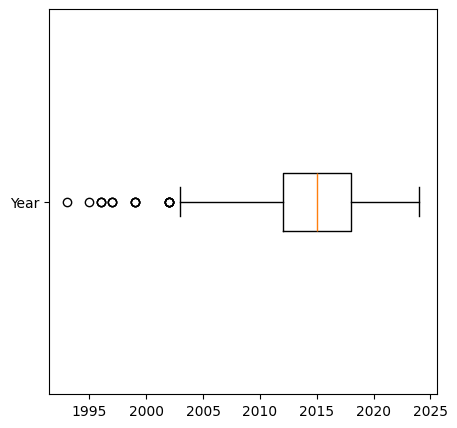

In [370]:
if setting_bag.show_books_by_year_box_plot:
    PlotManager().show_box_plot(df = books_df, x_name = "Year")


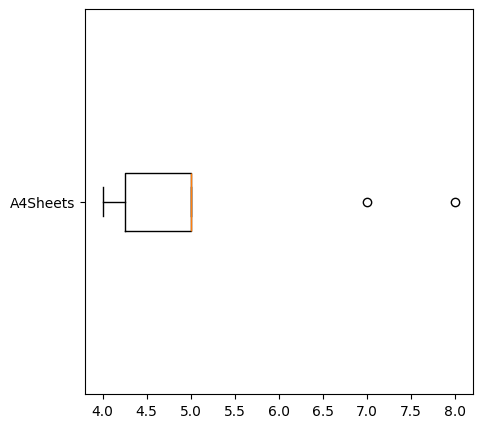

In [371]:
if setting_bag.show_reading_list_by_kbsize_box_plot:
    PlotManager().show_box_plot(df = rl_by_kbsize_df, x_name = "A4Sheets")


#### Main : Markdown Files

In [372]:
markdown_processor : MarkdownProcessor = MarkdownProcessor(component_bag = ComponentBag())
markdown_processor.try_show_readme_md(rolling_total_df = rolling_total_df, setting_bag = setting_bag)


|   Years |   Books |   Pages | TotalSpend   | LastUpdate   |
|--------:|--------:|--------:|:-------------|:-------------|
|       9 |     274 |   73085 | $7611.63     | 2024-03-23   |



In [373]:
markdown_processor.try_show_and_save_reading_list_by_month_md(
    sas_by_month_df = sas_by_month_df, 
    sas_by_year_street_price_df = sas_by_year_street_price_df, 
    setting_bag = setting_bag)


In [374]:
markdown_processor.try_show_and_save_reading_list_by_publisher_md(
    sas_by_publisher_flt_df = sas_by_publisher_flt_df, 
    sas_by_publisher_df = sas_by_publisher_df,
    setting_bag = setting_bag)


In [375]:
markdown_processor.try_show_and_save_reading_list_by_rating_md(
    sas_by_rating_df = sas_by_rating_df, 
    setting_bag = setting_bag)


In [376]:
markdown_processor.try_show_and_save_reading_list_by_topic_md(
    sas_by_topic_df = sas_by_topic_df, 
    setting_bag = setting_bag)


In [377]:
markdown_processor.try_show_and_save_reading_list_topic_trend_md(
    yt_by_topic_df = yt_by_topic_df, 
    setting_bag = setting_bag)

In [378]:
markdown_processor.try_show_and_save_reading_list_md(books_df = books_df, setting_bag = setting_bag)
